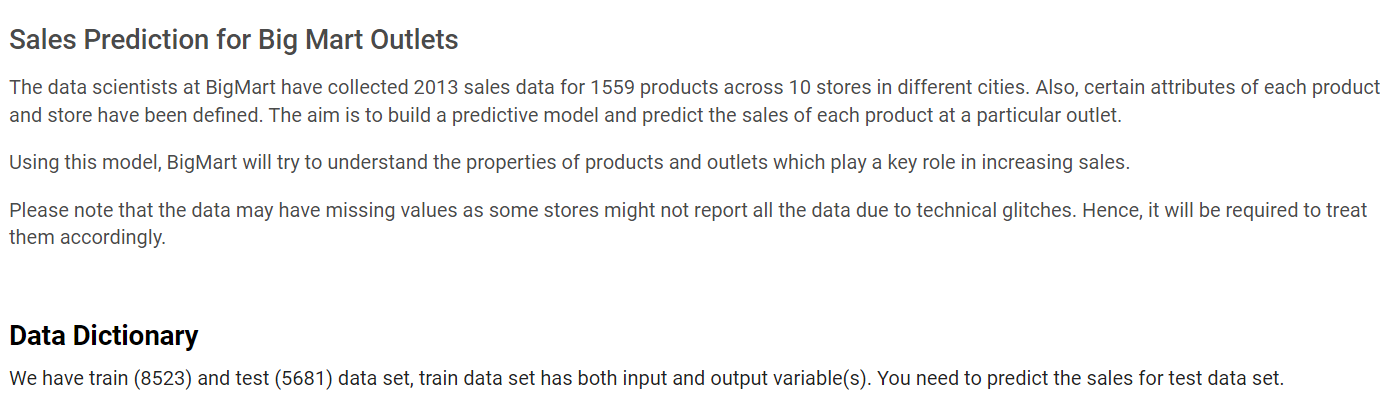

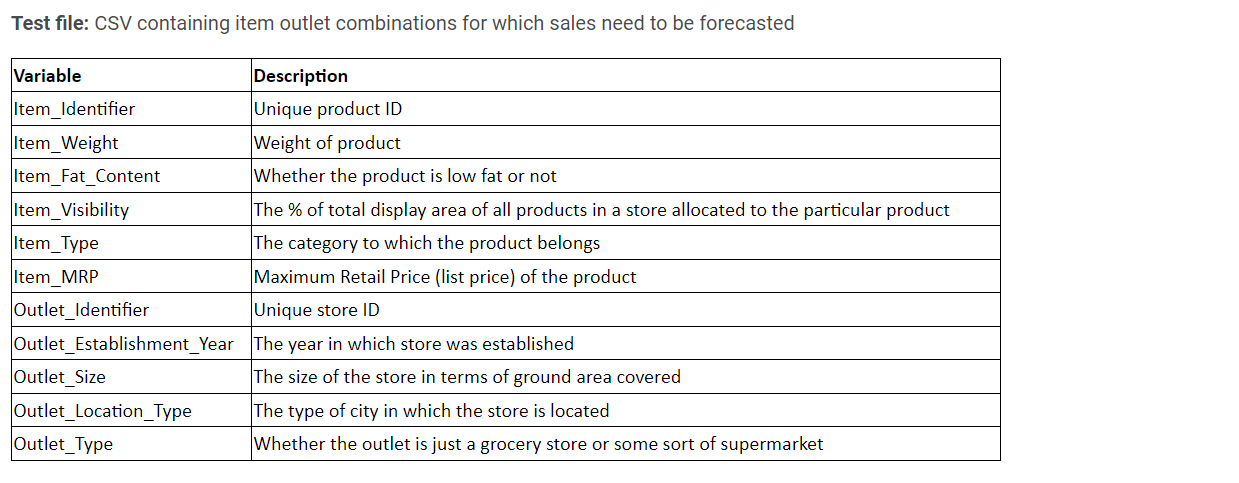

### Importing the necessary libraries

In [1]:
import pandas as pd      
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Importing libraries for model building

In [2]:
# Algorithm used to build the model

from sklearn.model_selection import train_test_split   # to perfom train test split
from sklearn.linear_model import LinearRegression      
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# For scaling my data  -- 
from sklearn.preprocessing import StandardScaler

### Loading the Dataset

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape,test.shape)

(8523, 12) (5681, 11)


In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Checking the datatypes of each features

In [6]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Now will check for duplicated values

In [7]:
train[train.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


### Now will concat Train and Test data to perform Data Preprocessing

In [8]:
df=pd.concat([train,test],axis=0,ignore_index=True)

In [9]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
df[df['Item_Identifier']=='FDA15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208
9638,FDA15,9.3,Low Fat,0.016022,Dairy,249.9092,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN


In [11]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


### Now again we are checking for dupliates

In [12]:
df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


### Checking the shape of the dataframe

In [13]:
df.shape

(14204, 12)

In [14]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [17]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [19]:
for i in df.columns:
    print('Feature =',i,'\n')
    print(df[i].unique())
    print('No of unique values = ',df[i].nunique(),'\n')

Feature = Item_Identifier 

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
No of unique values =  1559 

Feature = Item_Weight 

[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1   

The data preprocessing steps to be done 

1. Item_Visibility should not be having 0 as its minimum 
2. In Item_Identifier we can take only starting 2 char and will use for prediction
3. In Item_Fat_Content we have only 2 levels but due to typoerror we have 5 levels
4. will convert Outlet_Establishment_Year to the age of the store establishment


## Will check for missing values

In [20]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [21]:
miss_val=df.isnull().sum()
miss_val[miss_val>0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

Item_Outlet_Sales has no missing values where in test data we dont have the target variable so we are getting the null counts here so we should not treat the target variable [Item_Outlet_Sales]

In [22]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [23]:
df.Item_Identifier

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 14204, dtype: object

### Filling the null values in Item weight column

In [24]:
df[df['Item_Identifier']=='FDY38'].groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
FDY38    13.6
Name: Item_Weight, dtype: float64

In [25]:
df[df.Item_Identifier=='FDU15'][['Item_Identifier','Item_Weight']]

,Item_Identifier,Item_Weight
1038,FDU15,13.65
2407,FDU15,13.65
3162,FDU15,13.65
4487,FDU15,13.65
7636,FDU15,13.65
7646,FDU15,13.65
9670,FDU15,13.65
10020,FDU15,13.65
11321,FDU15,NaN
11821,FDU15,NaN


Hence we can see that the item weight of same items under the same item identifier are the same. So we need to fill in the null values with the mean value

In [26]:
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].apply( lambda x : x.fillna(x.mean()))

In [27]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [28]:
train.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

So in order to fill the null values in outlet size we can give **small** to all grocery store outlets **medium** to all supermarket type 2&3 and we can give **small** to supermarket type 1 since it is the most occuring element

In [29]:
df['Outlet_Size']= df.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x : x.fillna(x.mode()[0]))

In [30]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

### Hence we have treated all Null values

### Feature Engineering

In [31]:
df1=df.copy(deep=True) #making a copy

In [32]:
df=df.reset_index(drop=True)

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Now will modify item visibility because we cannot have 0 in item visibility

In [34]:
df[df.Item_Identifier=='FDN15'][['Item_Identifier','Item_Visibility']]

,Item_Identifier,Item_Visibility
2,FDN15,0.016760
759,FDN15,0.028009
4817,FDN15,0.016720
5074,FDN15,0.016802
6163,FDN15,0.016768
6952,FDN15,0.029299
8349,FDN15,0.016653
9682,FDN15,0.016731
12603,FDN15,0.016829
13358,FDN15,0.000000


I have notice that visibility of certain items are 0 which cannot be true. And the items with similar item identifier has almost same visibility. So we will impute the column of item_visibility with the mean of item visibility of similar item identifiers where the value is 0

In [35]:
df['Item_Visibility'] = df.groupby('Item_Identifier')['Item_Visibility'].apply(lambda x : x.replace(0,x.mean()))

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Will work on the typo error in the Item_Fat_Content


In [37]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [38]:
# Now will replace the data accourdingly

df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [39]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

### Now will take only 2 char from the Item_Identifier


In [40]:
df['New_Item_Identifier']=df['Item_Identifier'].apply(lambda x : x[0:2])

In [41]:
df['New_Item_Identifier'].value_counts()

FD    10201
NC     2686
DR     1317
Name: New_Item_Identifier, dtype: int64

In [42]:
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [43]:
# Now will replace the data where ever we having the NC in the New_Item_Identifier the Item_Fat_Content should be others

df.loc[df['New_Item_Identifier']=='NC','Item_Fat_Content']='others'

In [44]:
df['Item_Fat_Content'].value_counts()

Low Fat    6499
Regular    5019
others     2686
Name: Item_Fat_Content, dtype: int64

In [45]:
# We have collected the data from year 2013 so we are subtracting outlet Estiablishment year with 2013
df['age_of_store']=2013-df.Outlet_Establishment_Year

In [46]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,others,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [47]:
df2=df.copy(deep=True)

### Now will drop those features where we have performed data preprocessing technique and now those columns are not useful for prediction

In [48]:
df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [49]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,others,0.009780,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,26


### In machine learning, encoding techniques are used to convert categorical variables, such as text labels into numerical values, that can be used as input for a model because most of Machine learning model cannot understand text labels 

In [50]:
new_df=pd.get_dummies(columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Identifier'],data=df,drop_first=True)

In [51]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,others,0.009780,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [52]:
new_df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,0.016047,Dairy,249.8092,3735.1380,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,Soft Drinks,48.2692,443.4228,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,Meat,141.6180,2097.2700,14,0,0,1,0,0,0,1,0,0,1,0
3,19.20,0.017834,Fruits and Vegetables,182.0950,732.3800,15,1,0,0,1,0,1,0,0,0,1,0
4,8.93,0.009780,Household,53.8614,994.7052,26,0,1,0,0,0,1,1,0,0,0,1


### Performing label encoding in Item Type column

In [53]:
new_df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()
new_df['Item_Type'] = le.fit_transform(new_df['Item_Type'])

In [56]:
new_df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.30,0.016047,4,249.8092,3735.1380,14,0,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,14,48.2692,443.4228,4,1,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,10,141.6180,2097.2700,14,0,0,1,0,0,0,1,0,0,1,0
3,19.20,0.017834,6,182.0950,732.3800,15,1,0,0,1,0,1,0,0,0,1,0
4,8.93,0.009780,9,53.8614,994.7052,26,0,1,0,0,0,1,1,0,0,0,1


In [57]:
test_df = new_df[new_df['Item_Outlet_Sales'].isnull()]

In [58]:
test_df.shape

(5681, 17)

In [59]:
new_df.drop(new_df[new_df['Item_Outlet_Sales'].isna()].index, inplace=True)

In [60]:
new_df.isnull().sum()

Item_Weight                      0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Item_Outlet_Sales                0
age_of_store                     0
Item_Fat_Content_Regular         0
Item_Fat_Content_others          0
Outlet_Size_Medium               0
Outlet_Size_Small                0
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
New_Item_Identifier_FD           0
New_Item_Identifier_NC           0
dtype: int64

### I have now seperated the rows which had null values for item outlet sales which is our target vaiable and kept the rest in new df dataframe to train the model

### We can see that the target variable is not normally distributed. Hence performing cube root to tranform the variable to normal distribution

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

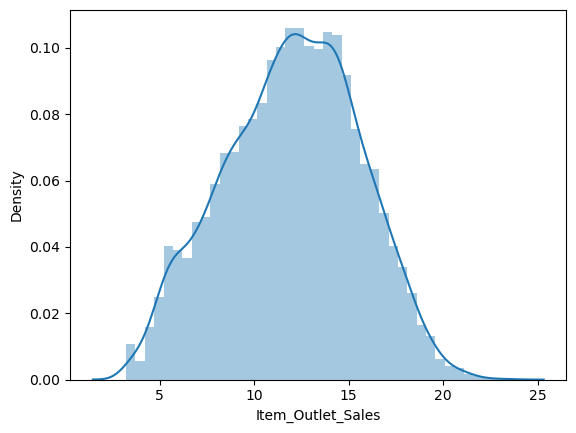

In [61]:
sns.distplot(np.cbrt(new_df.Item_Outlet_Sales))

In [62]:
new_df['Item_Outlet_Sales']=np.cbrt(new_df.Item_Outlet_Sales)
new_df

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
0,9.300,0.016047,4,249.8092,15.515611,14,0,0,1,0,0,0,1,0,0,1,0
1,5.920,0.019278,14,48.2692,7.625576,4,1,0,1,0,0,1,0,1,0,0,0
2,17.500,0.016760,10,141.6180,12.800240,14,0,0,1,0,0,0,1,0,0,1,0
3,19.200,0.017834,6,182.0950,9.013888,15,1,0,0,1,0,1,0,0,0,1,0
4,8.930,0.009780,9,53.8614,9.982319,26,0,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,14.058233,26,0,0,0,0,0,1,1,0,0,1,0
8519,8.380,0.046982,0,108.1570,8.189661,11,1,0,0,1,1,0,1,0,0,1,0
8520,10.600,0.035186,8,85.1224,10.606219,9,0,1,0,1,1,0,1,0,0,0,1
8521,7.210,0.145221,13,103.1332,12.266265,4,1,0,1,0,0,1,0,1,0,1,0


### Now our Feauture Engineering process is also over. So let's move on to model building

### Sep Dependent and Independent Variable

In [63]:
X = new_df.drop('Item_Outlet_Sales',axis=1)
y = new_df['Item_Outlet_Sales']

###  Performing Train Test Split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 14)

In [65]:
# standardising the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Linear Regression

In [66]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

rmse_train = 2.0256652308584053
rmse_test = 1.992577973005244
r2_score_train = 0.6814965965928285
r2_score_test = 0.6874183735825082


### Decision Tree

In [67]:
DM = DecisionTreeRegressor()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  1.9916784285859995e-17
rmse_test =  2.7947470386528357
train_score =  1.0
test_score =  0.3850811509223695


In [68]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.7849876917919205
rmse_test =  2.0546469528778473
train_score =  0.9521695546763141
test_score =  0.6676411763277659


There is high level of overfitting. Let me run some hyperparameters to improve my model accuracy

In [69]:
parameters = {'n_estimators':[100,200,300,400,500],
              'max_features':['sqrt','log2'],
              'max_depth':[3,4,5,6,7],
              'min_samples_split':[3,4,6,7,8],
              'min_samples_leaf':[2,3,5,7,8],
              'criterion':['squared_error', 'absolute_error', 'friedman_mse','poisson']}
             

In [70]:
from sklearn.model_selection import RandomizedSearchCV

RF_model = RandomizedSearchCV(estimator = RF,param_distributions = parameters,cv=5,random_state = 0)

In [71]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 3, 5, 7, 8],
                                        'min_samples_split': [3, 4, 6, 7, 8],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=0)

In [72]:
# Best Parameters
RF_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'squared_error'}

In [138]:
RF = RandomForestRegressor(n_estimators = 400,min_samples_split = 4,min_samples_leaf =3,max_features ='auto',max_depth = 5)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  1.945081822236446
rmse_test =  1.9454324601081374
train_score =  0.7063334506776333
test_score =  0.7020350968112627


### Hence after hypertuning I got RandomForest as my best model with 70% accuracy

### Test data

In [161]:
test_df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,age_of_store,Item_Fat_Content_Regular,Item_Fat_Content_others,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Identifier_FD,New_Item_Identifier_NC
8523,20.750,0.007565,13,107.8622,NaN,14,0,0,1,0,0,0,1,0,0,1,0
8524,8.300,0.038428,4,87.3198,NaN,6,1,0,0,1,1,0,1,0,0,1,0
8525,14.600,0.099575,11,241.7538,NaN,15,0,1,0,1,0,1,0,0,0,0,1
8526,7.315,0.015388,13,155.0340,NaN,6,0,0,0,1,1,0,1,0,0,1,0
8527,13.600,0.118599,4,234.2300,NaN,28,1,0,1,0,0,1,0,0,1,1,0


In [162]:
test_df.drop('Item_Outlet_Sales',axis=1,inplace = True)

In [163]:
Predicted_sales = pd.Series(RF.predict(test_df))